Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Откроем файл и изучим информацию:

In [1]:
import pandas as pd
data=pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных много пропуском. Посмотрим их подробнее и выведим 10 строк

In [2]:
data.head(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# Шаг 2. Подготовка данных

Для удобства заменим названния - приведем к одному единому виду и проверим:

In [3]:
data.columns = data.columns.str.lower()

In [4]:
data.head(40)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Далее поменяем типы данных:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


аббревиатура от To Be Determined. Пишется тогда, когда игра имеет недостаточное количество отзывов для подсчета рейтинга пользователей, по сути это тот же NAN

In [6]:
import numpy as np
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [7]:
data['user_score'] = data['user_score'].astype(float)
data['user_score'].dtype

dtype('float64')

Для аналитики не нужны игры без года создания, т.к. данные не могут быть актуальными на выбранный поздний период.

In [8]:
data.drop(data[data['year_of_release'].isna()].index,inplace=True)
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


 Думаю, пропуски можно заменить игровой константой tbd, потому что Помимо ESRB, существуют и другие рейтинговые системы оценки игр
 Критику заменим на ноль 

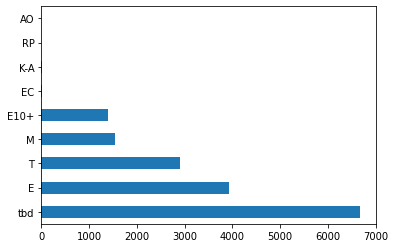

In [9]:
#так как столбец рейтинг ESRB категориальный, то лучшей заменой будет проставнока игровой константы - tbd
data['rating'].fillna('tbd', inplace=True)
data['critic_score'].fillna(0, inplace=True)

#games_table.loc[games_table['rating'] == 'None', 'rating'] = 'tbd'
data['rating'].value_counts().plot(kind='barh');

Пропуски в столбце rating были замененны на tbd, что означает что рейтинга нет или он ожидается
Пропуски в столбцах critic_score были заменены на нулевые, что означает, что нет оценки. Сделать замену на медианное или какое-либо иное значение на текущем этапе нельзя, т.к. будет смещение в данных

Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец.

In [10]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [11]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,NaN,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,NaN,tbd,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,NaN,tbd,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,NaN,tbd,28.31


Вывод: при подготовке данных к анализу были заполненны пропуски, заменено значение TBD на Nan в колонке 'user_score', во всех клонках установлен правильный тип данных, также были посчитаны суммарные мировые продажи.

# Шаг 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в каждый год

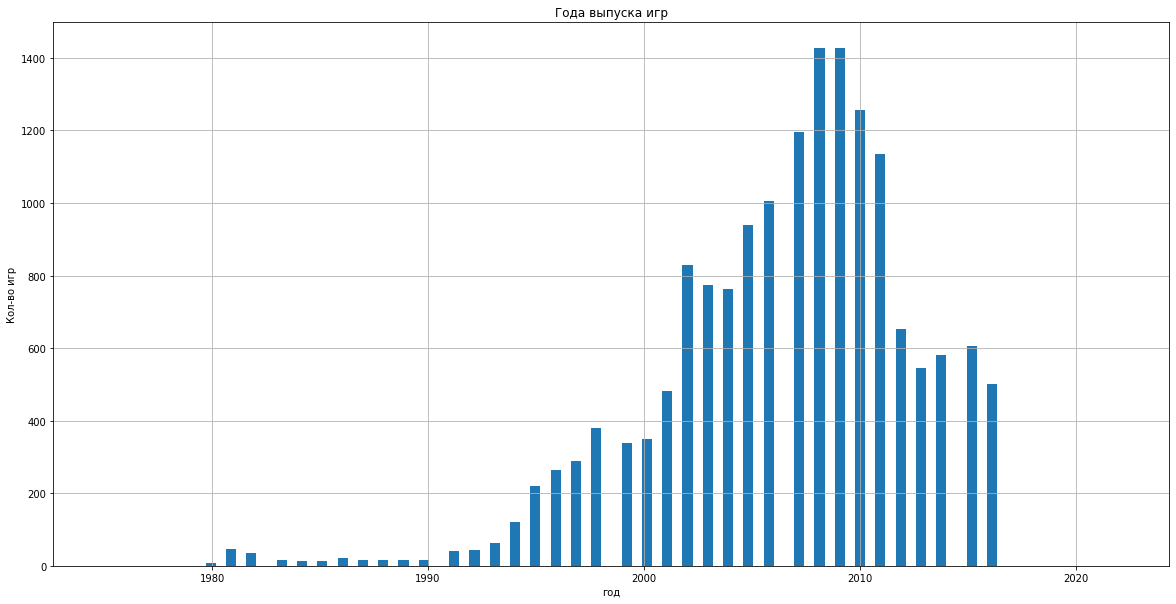

In [12]:
ax = data['year_of_release'].hist(bins=100, range=(1975, 2022), figsize=(20,10))\
    .set(title = 'Года выпуска игр', xlabel = 'год', ylabel = 'Кол-во игр')

Первые игры появиоист в 1980, и количество в течение 10 лет было примерно одинаковое. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. 

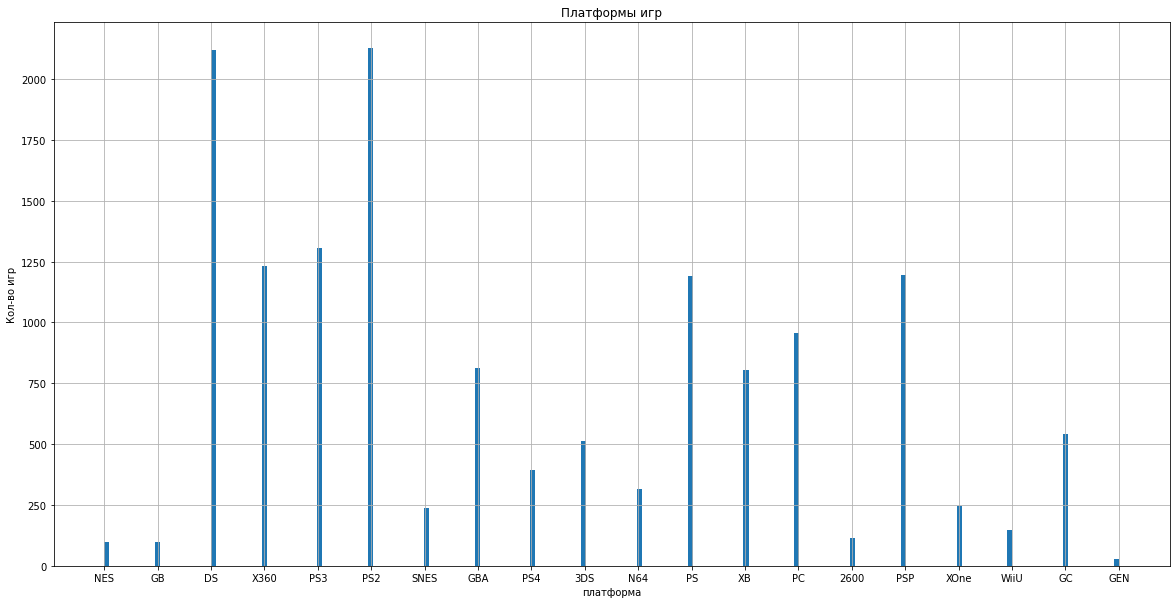

In [13]:
ax = data['platform'].hist(bins=200, range=(1, 20), figsize=(20,10))\
    .set(title = 'Платформы игр', xlabel = 'платформа', ylabel = 'Кол-во игр')

 Для нашего прогноза целесообразно рассмотреть период за последние 5 лет, т.е те платформы которые набирают популярность, либо находятся на пике.

In [14]:
actual_platforms = data.query('year_of_release >= 2012')
actual_platforms_search = (actual_platforms.groupby(['platform'],as_index = False)['sales_total'].sum()
                                 .sort_values('sales_total',ascending = False)
                           )
actual_platforms_search

,platform,sales_total
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


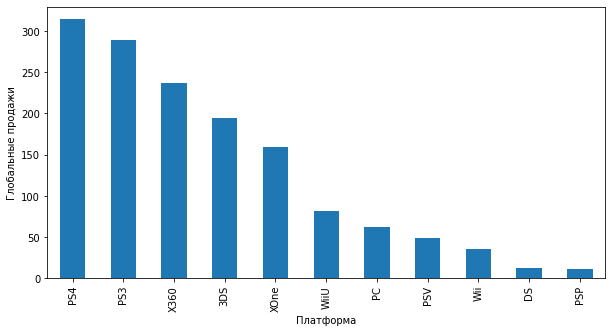

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

(actual_platforms_search.plot(kind='bar',x='platform', y='sales_total',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()

In [16]:
top_now = actual_platforms_search['platform'].tolist()
top_now

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

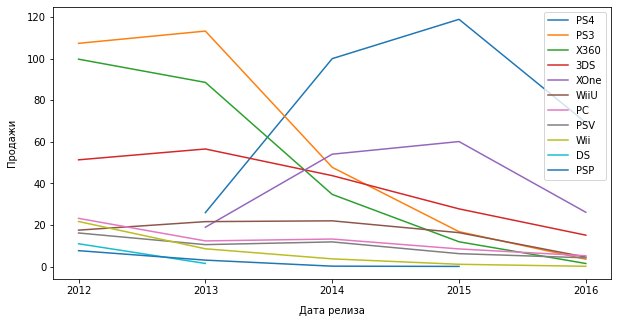

In [17]:
for name in top_now:
    actual_platforms.query('platform == @name').pivot_table(index = 'year_of_release',
                        values = 'sales_total', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['sales_total'].plot(figsize=(10, 5), label = name)
    
    plt.xticks(np.arange(2012, 2017, step=1))
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 10)
    plt.legend()

Продажи падают на всех платформах.
Неплохие продажи показывают только PS4 от Sony и XOne от Microsoft.

In [18]:
promising_platforms = actual_platforms.query('platform == "PS4" or platform == "XOne"')
promising_platforms_stats = (promising_platforms.groupby(['platform','year_of_release'],as_index = False)['sales_total'].sum()
                                 .sort_values('platform',ascending = False)
                           )
promising_platforms_stats

,platform,year_of_release,sales_total
4,XOne,2013,18.96
5,XOne,2014,54.07
6,XOne,2015,60.14
7,XOne,2016,26.15
0,PS4,2013,25.99
1,PS4,2014,100.00
2,PS4,2015,118.90
3,PS4,2016,69.25


Для актуального рейтинга необходимо выбрать современные платформы: 

Итак для дальнейшего исследования оставляем PS4 от Sony и XOne от Microsoft

Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат

[(0.0, 5.0)]

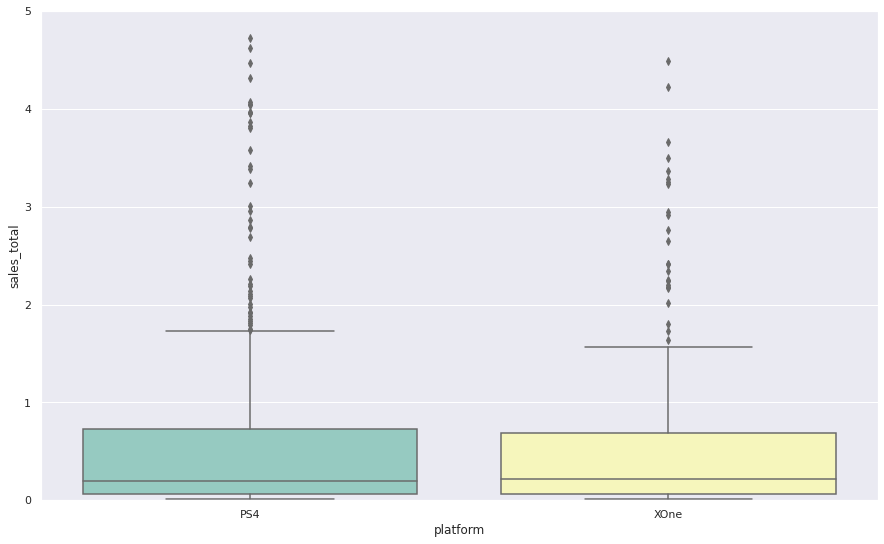

In [19]:
sns.set(rc={'figure.figsize':(15,9)}) # здесь я настраиваю размер самого графика в jupyter
ax = sns.boxplot(x="platform", y="sales_total", data= promising_platforms, palette="Set3")
ax.set(ylim=(0,5))

In [20]:
promising_platforms_mean_median_sale = (promising_platforms.pivot_table(index = 'platform'
                                                                 ,values='sales_total'
                                                                 ,aggfunc = ['mean','median']) 
                                )
promising_platforms_mean_median_sale

,mean,median
,sales_total,sales_total
platform,,
PS4,0.801378,0.20
XOne,0.645020,0.22


Видим, что в среднем одна игра выпущенная на платформе приносит порядка 1 млн долларов

Можно сделать вывод, что  игровые платформы в среднем существуют примерно по 10 лет. 
 Cамые продаваемые это PS2 и X360 
 Самый пик наступает примерно через 5 лет после выхода.
 На конец 2016 года лидируют по продажам следующие платформы:

PS3;
Wii;
Х360.
Это топ-3. Причем, исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.
Топ который подойдет для современного анализа рынка игр:


In [21]:
def create_any_sales_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = data.boxplot(column='sales_total', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = data.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='sales_total', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')
        create_any_sales_boxplot('Boxplot по глобальным продажам игр')

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

In [22]:
games_ps3 = data[(data['platform'] == 'PS3') & (data['critic_score'] > 0)].copy()

<AxesSubplot:xlabel='critic_score', ylabel='sales_total'>

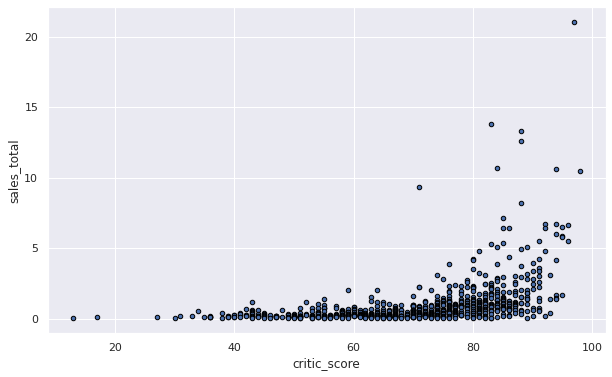

In [23]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

games_ps3 = data[(data['platform'] == 'PS3') & (data['critic_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='critic_score', y='sales_total', ec='black', figsize=(10,6))


In [24]:
games_ps3['critic_score'].corr(games_ps3['sales_total'])

0.4327589578997135

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику.

<AxesSubplot:xlabel='user_score', ylabel='sales_total'>

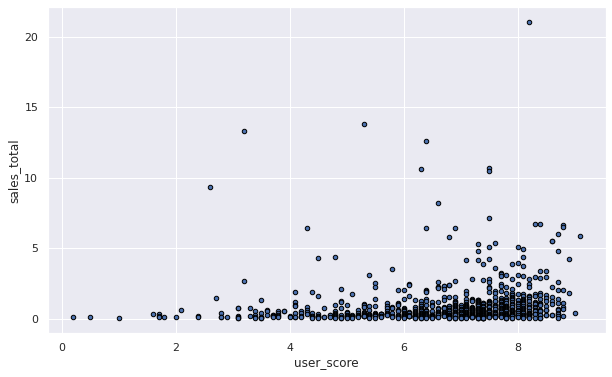

In [25]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
games_ps3 = data[(data['platform'] == 'PS3') & (data['user_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='user_score', y='sales_total', ec='black', figsize=(10,6))

In [26]:
games_ps3['user_score'].corr(games_ps3['sales_total'])

0.12841562938563006

Такая же картина, правда так называемых выбросов больше - когда рейтинг пользователей не велик, но тем не менее игра собирает большие деньги

Посмотри корреляцию

<AxesSubplot:>

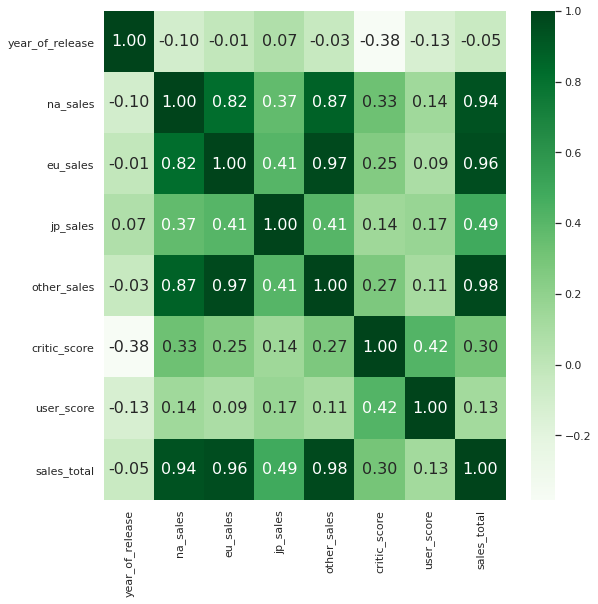

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(games_ps3.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':16})

In [28]:
games_ps3_filtered = games_ps3[['sales_total' ,'critic_score', 'user_score']]

<AxesSubplot:>

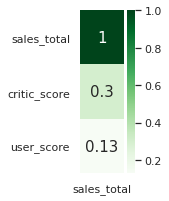

In [29]:
plt.figure(figsize=(1,3))
sns.heatmap(games_ps3_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15})

Сильнее всего на конечную стоимость влияет оценка критиков

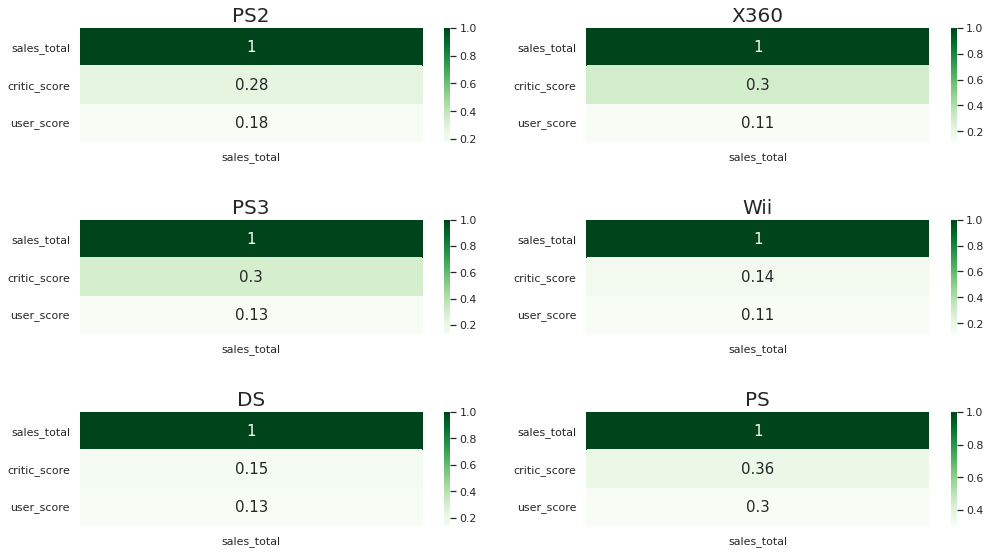

In [30]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = data[(data['platform'] == curr_platform) & (data['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Данные по корреляции между выручкой и оценкой по платформам PS2, X360, PS3, PS  более или менее совпадает с общими данными по датафрейму.
Выделяются Wii и DS, по которым зависимость не такая большая.

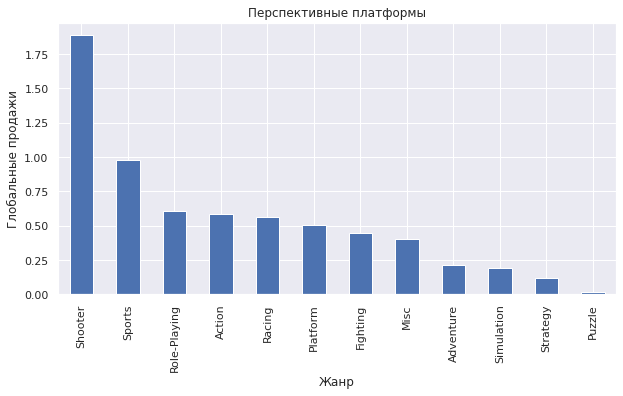

In [31]:
(promising_platforms
    .pivot_table(index='genre', values='sales_total')
    .sort_values('sales_total', ascending=False)
    .plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False,title = 'Перспективные платформы')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

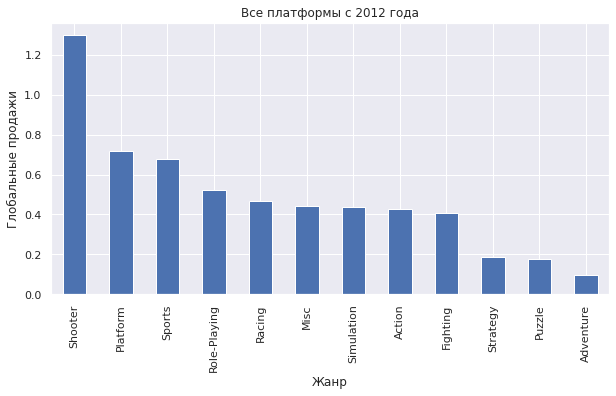

In [32]:
(actual_platforms
    .pivot_table(index='genre', values='sales_total')
    .sort_values('sales_total', ascending=False)
    .plot(kind='bar', y='sales_total', figsize=(10, 5), legend=False,title = 'Все платформы с 2012 года')
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

Самые популярные жанры ожидаемо - шутеры, спорт, гонки и рпг. Хуже всего продаются стратегии и квесты.

Если брать все платформы, то также популярен жанр "платформеры".
Далее рассмотрим более подробно в разрезе регионов.

# Шаг 4. Портрет пользователя каждого региона

Рассмотрим самые популярные платформы в каждом регионе:

<AxesSubplot:xlabel='platform'>

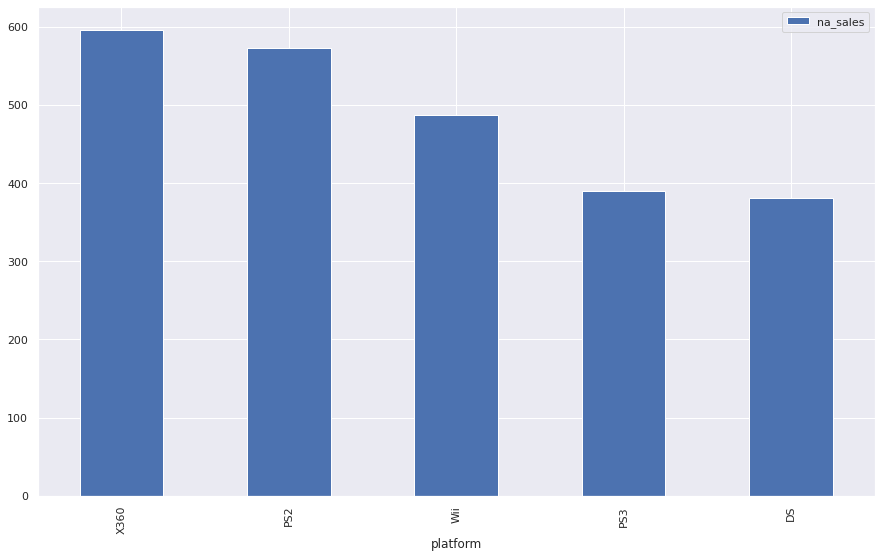

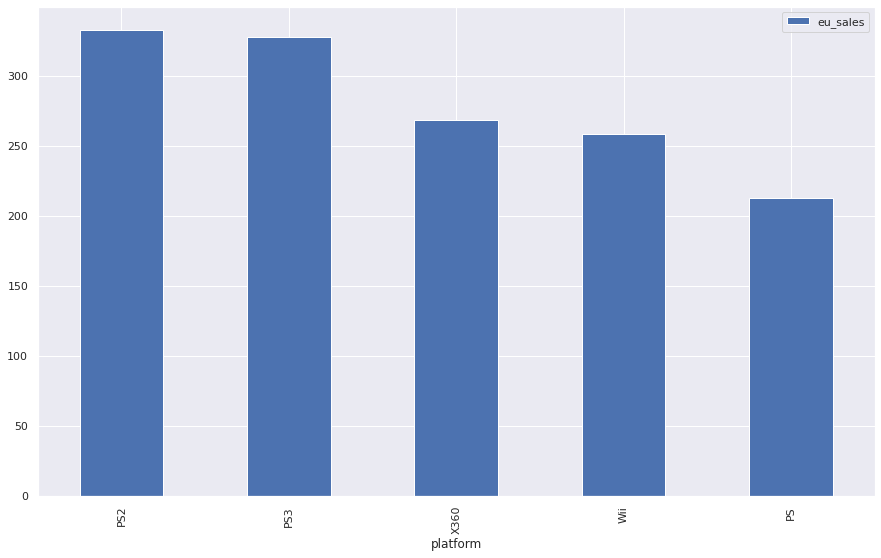

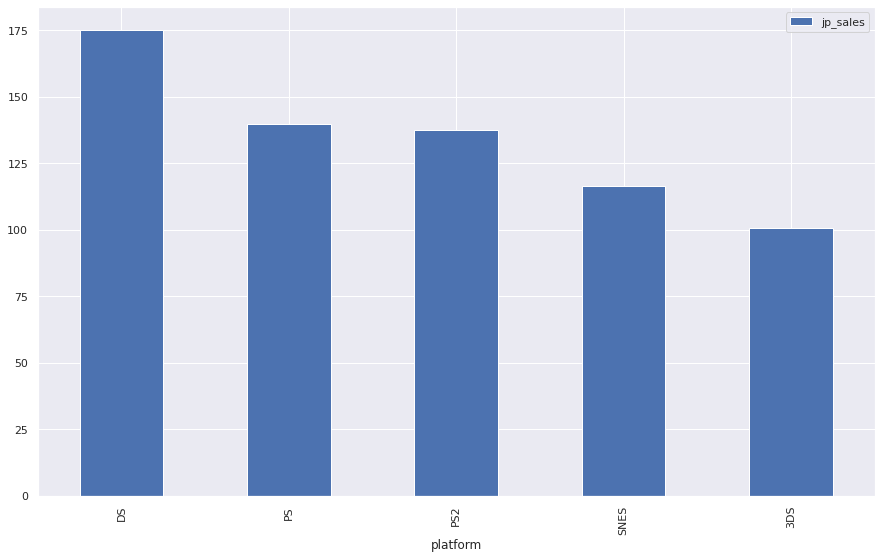

In [33]:
data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

Если в Европе и Америке платформы по популярности практически идентичны, то Япония явно выделяется своей платформой DS 

определим самые популярные жанры

<AxesSubplot:xlabel='genre'>

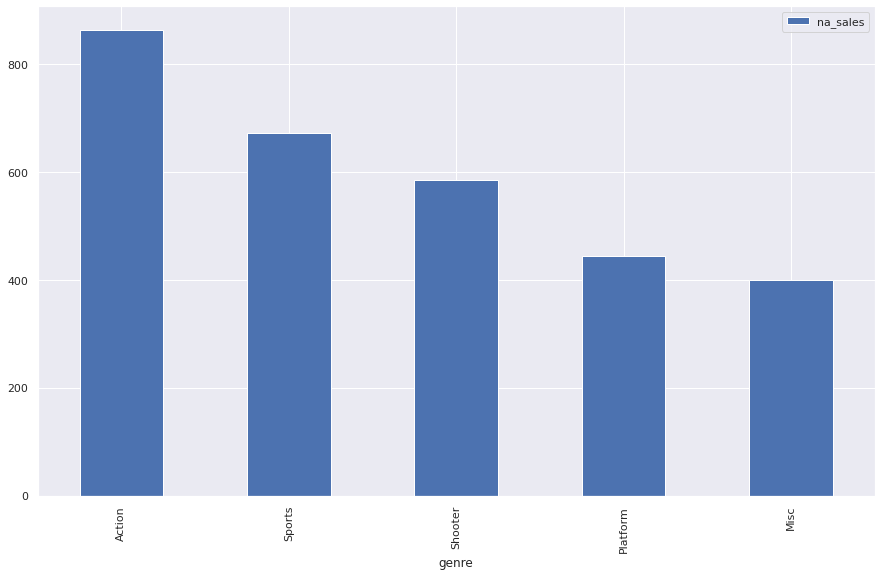

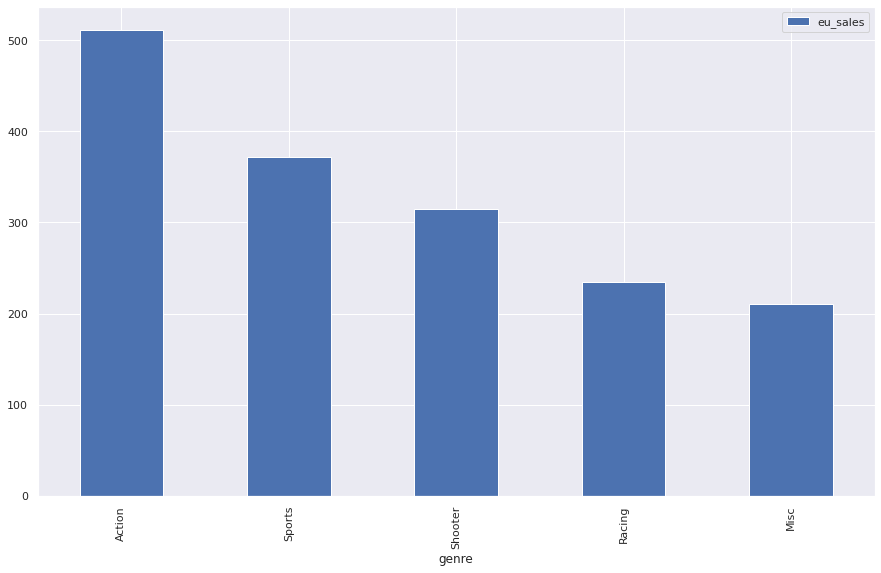

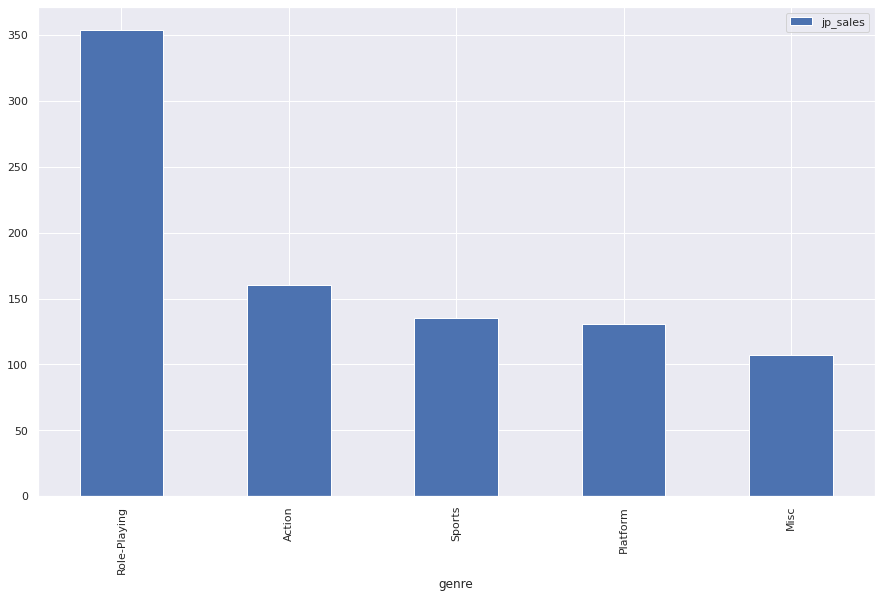

In [34]:
data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

 В жанрах Япония  выделяется, у них "Ролевые игры" удерживают 1 место, хотя в Европе и Америке они не попали даже в топ-5 - здесь Экшин в номер 1.

<AxesSubplot:xlabel='rating'>

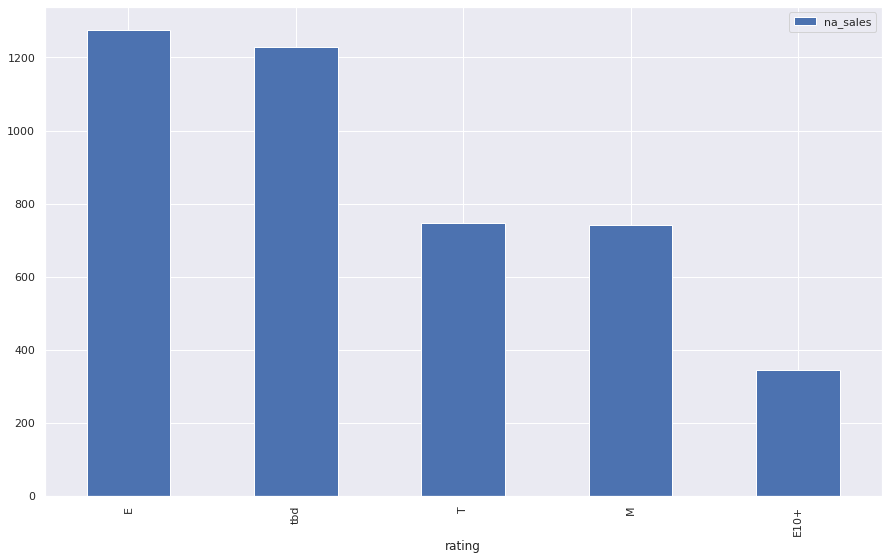

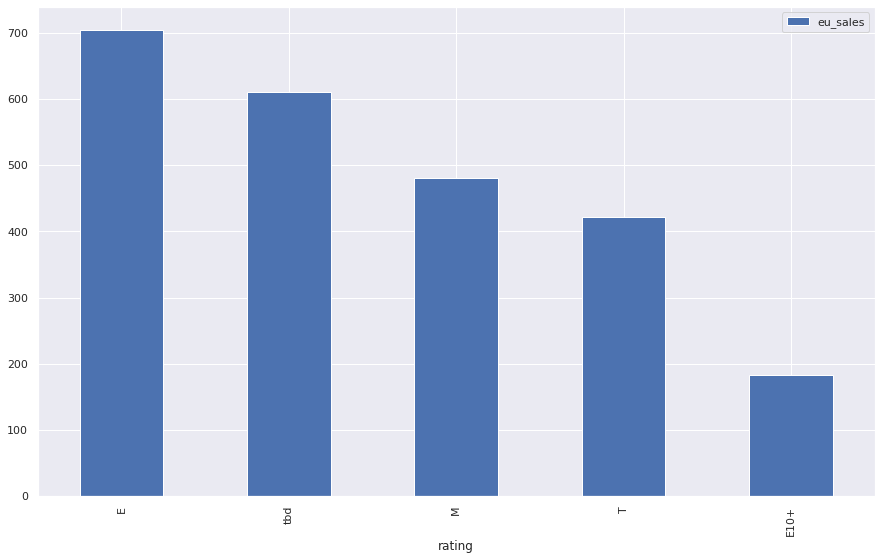

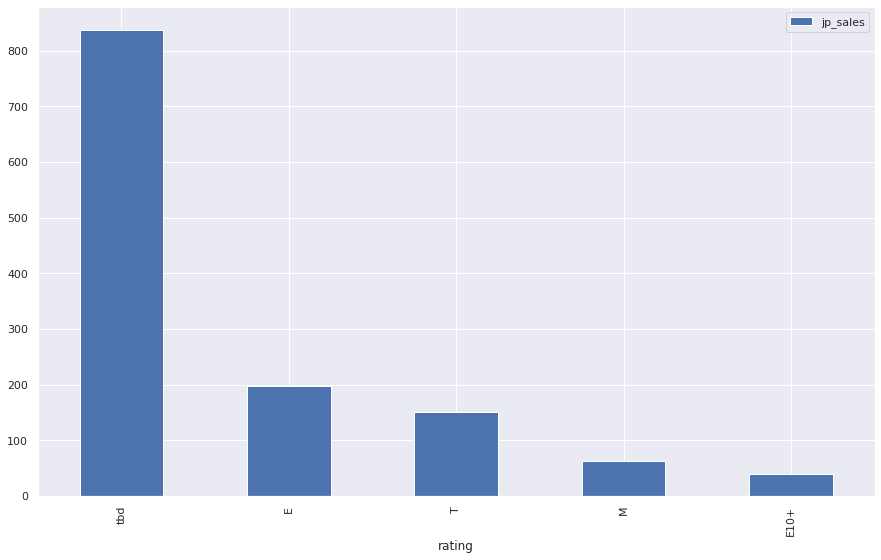

In [35]:
games_with_rating = data.loc[data['rating'] != 'out of rating']
games_with_rating.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games_with_rating.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games_with_rating.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

Первое место во всех регионах занимают игры без ограничений по возрасту('E'), второе и третье место делять игры для подростков('T') и для взрослых('M')

# 5. Проверка гипотез

 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Подготовим данные по первой гипотезе. Не будем учитывать игры с пустым рейтингом.

In [36]:
def stat_info(serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]
    left_border = d_min
    right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    variance_estimate = np.var(serie, ddof=1)
    standart_dev = np.std(serie, ddof=1)
    print('Среднее значение: {:.2f}'.format(mean))
    print('Дисперсия: {:.2f}'.format(variance_estimate))
    print('Стандартное отклонение: {:.2f}'.format(standart_dev))
    return [mean, variance_estimate, standart_dev]

06.11
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Среднее значение: 6.52
Дисперсия: 1.91
Стандартное отклонение: 1.38


[6.521428571428572, 1.9069968429360695, 1.380940564592144]

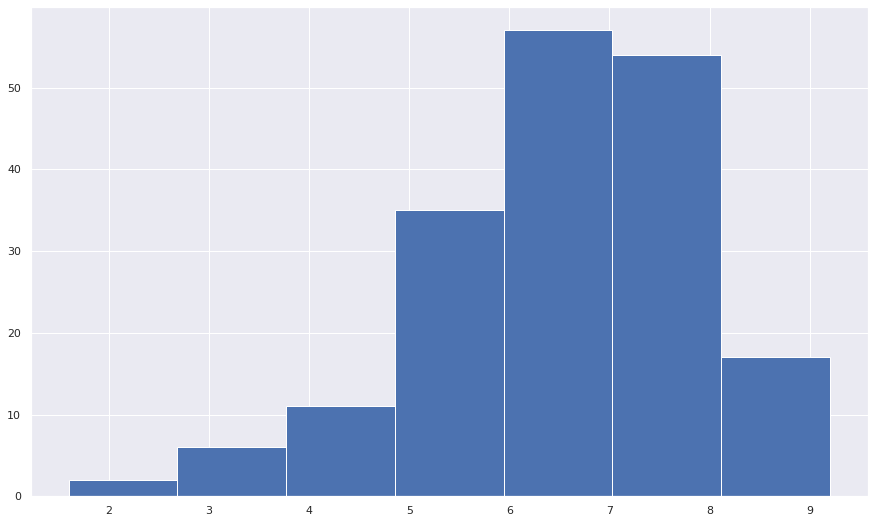

In [37]:
from scipy import stats as st
import numpy as np
user_rating_XOne =actual_platforms.query('platform == "XOne"')['user_score'].dropna()
stat_info(user_rating_XOne)

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64
Среднее значение: 6.43
Дисперсия: 2.77
Стандартное отклонение: 1.66


[6.4286407766990274, 2.770443997158418, 1.6644650783835682]

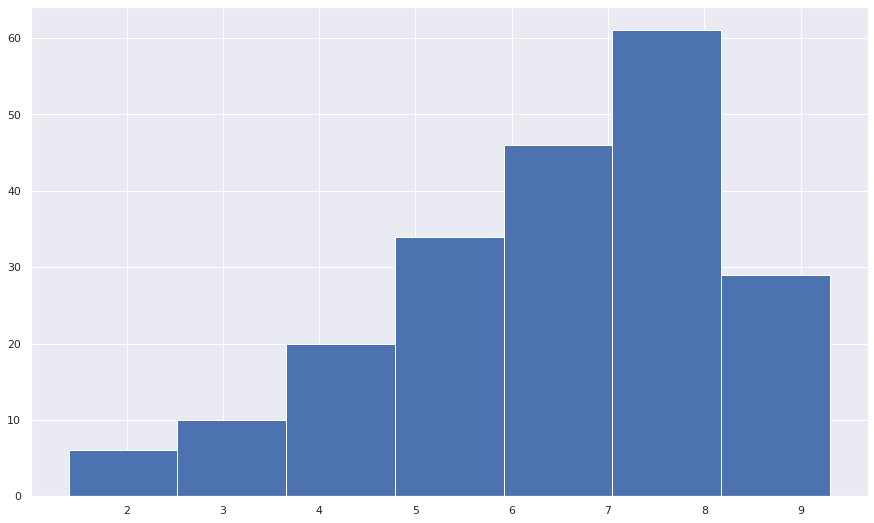

In [38]:
user_rating_PC =actual_platforms.query('platform == "PC"')['user_score'].dropna()
stat_info(user_rating_PC)

In [39]:
from scipy import stats as st
import numpy as np

alpha = .01
results = st.ttest_ind(user_rating_XOne, user_rating_PC)
print( results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


06.11 Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 Подготовим данные

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Среднее значение: 6.83
Дисперсия: 1.89
Стандартное отклонение: 1.37


[6.825047801147227, 1.8890840494348111, 1.3744395401161926]

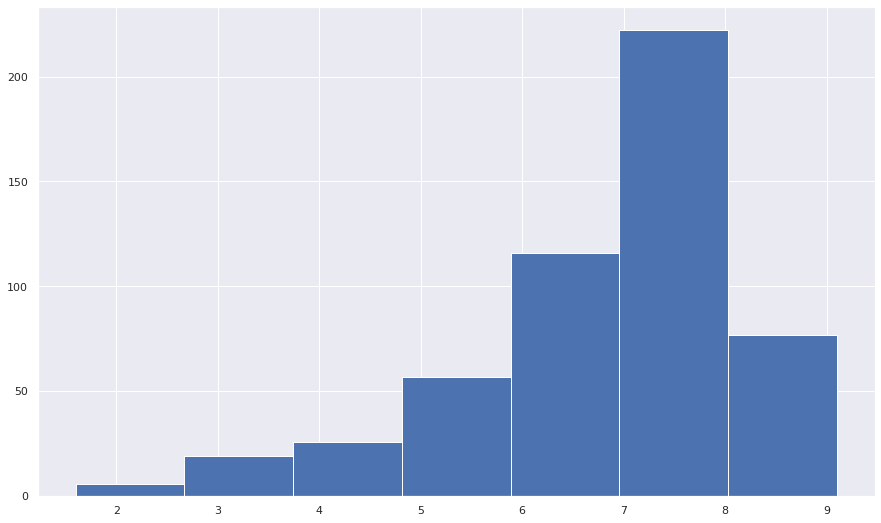

In [40]:
user_rating_Action = actual_platforms.query('genre == "Action"')['user_score'].dropna()
stat_info(user_rating_Action)

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64
Среднее значение: 5.46
Дисперсия: 3.02
Стандартное отклонение: 1.74


[5.455897435897437, 3.022890298704732, 1.7386461108301285]

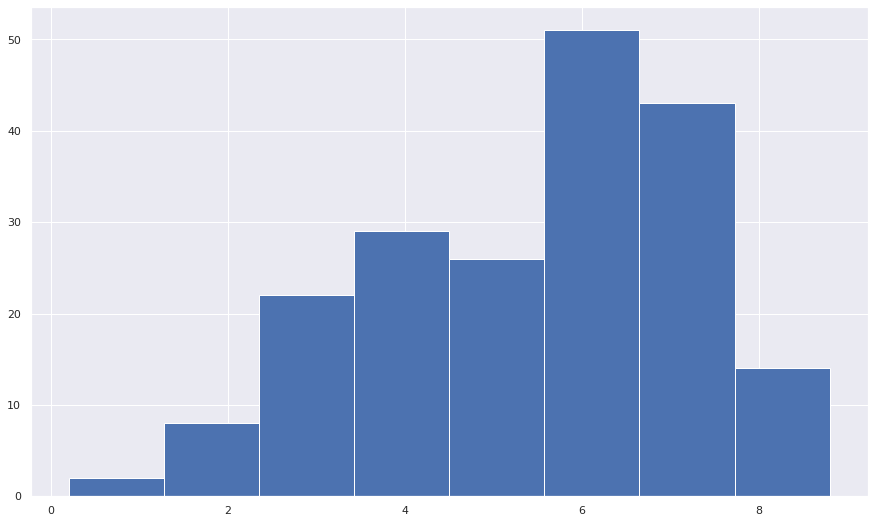

In [41]:
user_rating_Sports = actual_platforms.query('genre == "Sports"')['user_score'].dropna()
stat_info(user_rating_Sports)

In [42]:
alpha = .01

results = st.ttest_ind(user_rating_Action, user_rating_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


При получении ответа "Отвергаем нулевую гипотезу" это говорит о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

Общий вывод по анализу данных:


С 2010 года наблюдается спад продаж в игровой индустрии.
Платформы появляются и умирают в течение 10 лет.
Наиболее популярные и перспективные на данный момент платформы – это Sony PlayStation 4 и Xbox One.
В среднем одна игра выпущенная на платформе приносит прибыль около 300 тысяч долларов.
В США и Европе лучше всего продаются шутеры и экшены.
Больше всего продаж приходится на игры с рейтингом для взрослых и для всех.
Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры. Объём продаж в этой стране в 2.5 раза меньше покаталей Европы и Америки.
Потенциально выгодно разработать игру для рынка Европы и Америки на перспективных платформах Sony PlayStation 4 и Xbox One в жанре Shooter/Action. Японский рынок имеет свою специфику по платформам и жанрам, кроме того не слишком обширен.